# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

это для коллаба

In [ ]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/drive/MyDrive

Archive:  /content/drive/MyDrive/dataset.zip

replace /content/drive/MyDrive/dataset/train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

  inflating: /content/drive/MyDrive/dataset/val.zip  

error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
!unzip /content/drive/MyDrive/dataset/train.zip -d /content/drive/MyDrive/dataset

Выходные данные были обрезаны до нескольких последних строк (5000).

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWV7jDtEsQ28oBzsbIIfVG-F4AAIlAQACMGP4EvLlgLlAuzbmLwQ.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdW-VcOVZDoddQ5iW1Vl4j-CPUAAK9AAOz9pAOX4vVC42AyzUvBA.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWXKHRZL5D_rZ11kHD3G8qxBxAAKUSwAC6VUFGJkJit_US0owLwQ.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWxMjGFwiQ77TqCuJvq2LnWxkAAJ6CgACxdzwSa0HZdbZGeT8LwQ.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWxNtKj3ZyYsZMaBMFXIYLMQkAAJjDQACDGRBSe8NWWS6H50uLwQ.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWykQQki0iGB73AWNrL_1fx8sAAK1FwAC7HPhSZ-AfkaOzCShLwQ.png  

  inflating: /content/drive/MyDrive/dataset/train/U+1F92A/CAACAgIAAxUAAWSdWYMyb9KMCNdQGnK7MDjoJ_y4AALUgwACns4LAAHAn3aicTB70S8E.png  



In [ ]:
!unzip /content/drive/MyDrive/dataset/val.zip -d /content/drive/MyDrive/dataset

Archive:  /content/drive/MyDrive/dataset/val.zip

   creating: /content/drive/MyDrive/dataset/val/U+1F232/

  inflating: /content/drive/MyDrive/dataset/val/U+1F232/CAACAgIAAxUAAWSdeMJVk6ExF0qcEyOmw5vZ9PYmAAIJGgACx7FJS3LIktWMNnlOLwQ.png  

   creating: /content/drive/MyDrive/dataset/val/U+1F306/

  inflating: /content/drive/MyDrive/dataset/val/U+1F306/CAACAgQAAxUAAWSdZRnGC_mrkmb323WOd3zboW1TAAJSDgACOOggURrmHI_JQqWgLwQ.png  

   creating: /content/drive/MyDrive/dataset/val/U+1F31F/

  inflating: /content/drive/MyDrive/dataset/val/U+1F31F/CAACAgEAAxUAAWSdbbFotWMvyywebYUfpgGB_sRuAAInBAACUUr3AAGbcwwzbDLnyi8E.png  

  inflating: /content/drive/MyDrive/dataset/val/U+1F31F/CAACAgEAAxUAAWSdeCl6tOBADsA1zFJKOWeXJCsrAAJqBgACdwP3CzRBaapE52_lLwQ.png  

  inflating: /content/drive/MyDrive/dataset/val/U+1F31F/CAACAgEAAxUAAWSdobaAZ8ZdmUpeZ8ymxvpMkzOfAAJyAgACKrgoRWKO1_3r9AwzLwQ.png  

  inflating: /content/drive/MyDrive/dataset/val/U+1F31F/CAACAgEAAxUAAWSdobamWWNHyapY0whDcNvEufO7AAKeAgAC_dgAAUTPcG-963Nx

In [ ]:
#не пугайтесь возможно совпадающему пути к файлам, мне пришлось kaggle у одногруппника брать, потому что мой закончился(
seed_everything(123456)
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.025, saturation=0.025), #поменяем уровень дрожания изображения и оттенков
        transforms.RandomHorizontalFlip(p=0.35), #горизонтальный переворот иображения с вероятность 0.35
        transforms.RandomRotation(20), #поворот изображения на 20 градусов
        transforms.ToTensor(),
        transforms.Normalize((0.2, 0.2, 0.2), (1, 1, 1)), #значения нормализации взяты примерно
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.2, 0.2, 0.2), (1, 1, 1)),
    ]
)

train_dataset = ImageFolder('/kaggle/input/iad-2-dataset/train/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/input/iad-2-dataset/val/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=128, num_workers=4) # YOUR CODE HERE

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

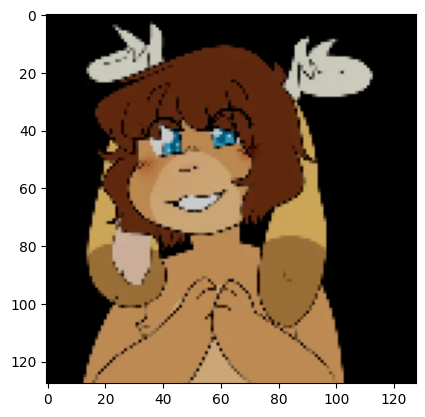

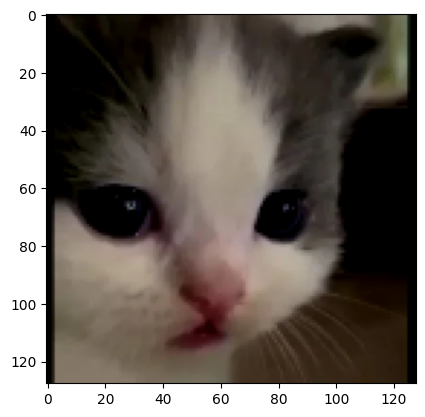

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE HERE
        pass

    def _forward(self, x):
        # runs the Neural Network
        # YOUR CODE HERE
        pass

    def forward(self, images, target=None):
        # YOUR CODE HERE
        pass

    def get_accuracy(self, reset=False):
        # YOUR CODE HERE
        pass

### Тренировочный класс lightning

In [ ]:
from torchvision.models import resnet18

In [ ]:
seed_everything(123456)

model = resnet18(weights=None)

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()
        self.pretrained = pretrained

        if pretrained:
            # <YOUR CODE HERE>
            self.model = resnet18(pretrained=True)
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(512, 2)
            self.optimizer = torch.optim.Adam(self.classifier.parameters())
        else:
            # <YOUR CODE HERE>
            self.model = resnet18(pretrained=False)
            self.model.fc = nn.Linear(self.model.fc.in_features, 2)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        if self.pretrained:
            # <YOUR CODE HERE>
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            # <YOUR CODE HERE>
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'binary')
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
# device = # YOUR CODE HERE

# model = YourNet() # YOUR CODE HERE
module = YourModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=3)  # YOUR CODE HERE
trainer.fit(module, train_dataloader, val_dataloader)  # YOUR CODE HERE

### Решение

In [ ]:
from torchvision.models import resnet18

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
seed_everything(123456)

num_epochs = 24

model_1 = resnet18(weights=None, num_classes=100).to(device)
optimizer = torch.optim.AdamW(model_1.parameters(), lr = 0.001, weight_decay= 0.25)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 23)

wandb.init()

In [ ]:
#код из семинара группы ОГО-3
def training_epoch(model, optimizer, criterion, train_loader, scheduler, tqdm_desc):
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size

        optimizer.zero_grad()
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        metrics = {
            "batch-train/loss": loss.item()
        }
        wandb.log(metrics)

    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    return train_loss, train_accuracy

@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size

        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    return test_loss, test_accuracy

def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, scheduler):
    #списки для сохранения значений метрик
    a = []
    b = []
    c = []
    d = []
    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_loader,scheduler,
            tqdm_desc=f'Training {epoch}/{num_epochs}')

        val_loss, val_accuracy = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        metrics = {
            "train/loss": train_loss,
            "train/accuracy": train_accuracy,
            "val/loss": val_loss,
            "val/accuracy": val_accuracy
        }
        wandb.log(metrics)
        a.append(train_loss)
        b.append(train_accuracy)
        c.append(val_loss)
        d.append(val_accuracy)

    return a, b, c, d

In [ ]:
seed_everything(123456)
train_losses, train_accuracies, test_losses, test_accuracies = train(
    model_1, optimizer, criterion, train_dataloader, val_dataloader, num_epochs, scheduler
)

Validating 24/24: 100%|██████████| 20/20 [00:02<00:00,  9.81it/s]


In [ ]:
test_accuracies

[0.1452,
 0.1544,
 0.144,
 0.1532,
 0.1664,
 0.182,
 0.1724,
 0.1724,
 0.1664,
 0.198,
 0.2104,
 0.1984,
 0.174,
 0.2092,
 0.2256,
 0.222,
 0.2104,
 0.2064,
 0.2204,
 0.2348,
 0.218,
 0.2188,
 0.2156,
 0.2408]

##### графики

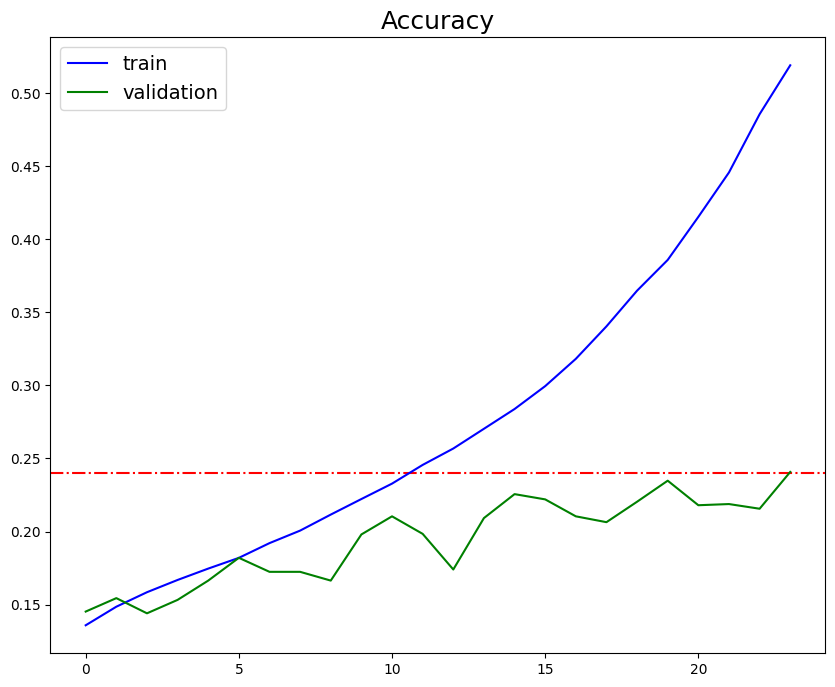

In [ ]:
plt.figure(figsize=(10, 8))
plt.axhline(y=0.24, color='red', linestyle='-.')
plt.plot([i for i in range(num_epochs)], train_accuracies, color="blue", label="train")
plt.plot([i for i in range(num_epochs)], test_accuracies, label="validation", color="green")
plt.title("Accuracy", fontsize=18)
plt.legend(fontsize=14)
plt.show()

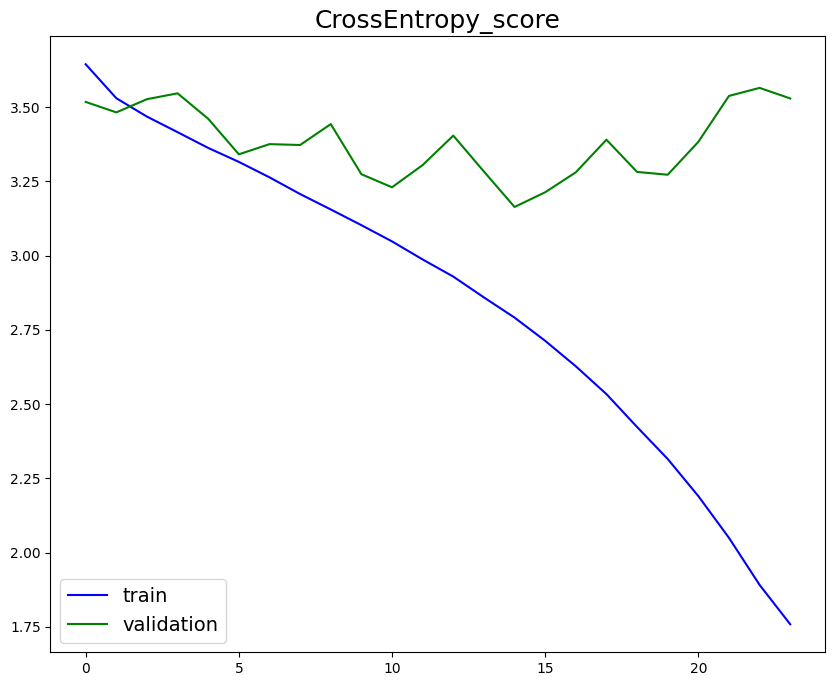

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot([i for i in range(num_epochs)], train_losses, color="blue", label="train")
plt.plot([i for i in range(num_epochs)], test_losses, label="validation", color="green")
plt.title("CrossEntropy_score", fontsize=18)
plt.legend(fontsize=14)
plt.show()

### Валидация результатов задания

In [ ]:
#чуть-чуть переделал под свой алгоритм + gpt помог
def evaluate_task(model, val_dataloader, criterion, device="cuda:0"):
    model.eval()
    total_accuracy = 0

    for images, answers in tqdm(val_dataloader):
        images = images.to(device)
        answers = answers.to(device)
        with torch.no_grad():
            y_pred = model(images)
            loss = criterion(y_pred, answers)
            total_accuracy += (y_pred.argmax(dim=1) == answers).sum().item()


    accuracy = total_accuracy / len(val_dataloader.dataset)
    return accuracy

In [ ]:
seed_everything(123456)
# model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model_1, val_dataloader, criterion)
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")

100%|██████████| 20/20 [00:02<00:00,  9.54it/s]

Оценка за это задание составит 5.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
wandb_logger = WandbLogger(log_model='all')
device =  # YOUR CODE HERE

model = YourNet().to() # YOUR CODE HERE
module = YourModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger)  # YOUR CODE HERE
trainer.fit()  # YOUR CODE HERE

### Решение

In [ ]:
from torchvision.models import ResNet18_Weights
from torchvision.models import resnet34
from torchvision.models import ResNet34_Weights
from torchvision.models import resnet50
from torchvision.models import ResNet50_Weights

In [ ]:
seed_everything(123456)
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.025, saturation=0.025),
        transforms.RandomHorizontalFlip(p=0.2),
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomRotation(20),
        transforms.RandomAutocontrast(p=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

train_dataset = ImageFolder('/kaggle/input/iad-2-dataset/train/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/input/iad-2-dataset/val/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=128, num_workers=4) # YOUR CODE HERE

In [ ]:
seed_everything(123456)

num_epochs = 10

model_2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

#добавили ещё один слой в конец под нашу задачу с нужным числом классов
model_2.fc = torch.nn.Linear(model_2.fc.in_features, 100)
model_2.to(device)

optimizer = torch.optim.AdamW(model_2.parameters(), lr = 0.0001, weight_decay= 0.25)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 23)

wandb.init()

In [ ]:
def training_epoch(model, optimizer, criterion, train_loader, scheduler, tqdm_desc):
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size

        optimizer.zero_grad()
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        metrics = {
            "batch-train/loss": loss.item()
        }
        wandb.log(metrics)

    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    return train_loss, train_accuracy

@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    return test_loss, test_accuracy

def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, scheduler):
    a = []
    b = []
    c = []
    d = []
    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_loader,scheduler,
            tqdm_desc=f'Training {epoch}/{num_epochs}')

        val_loss, val_accuracy = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        metrics = {
            "train/loss": train_loss,
            "train/accuracy": train_accuracy,
            "val/loss": val_loss,
            "val/accuracy": val_accuracy
        }
        wandb.log(metrics)
        a.append(train_loss)
        b.append(train_accuracy)
        c.append(val_loss)
        d.append(val_accuracy)

    return a, b, c, d

In [ ]:
seed_everything(123456)
train_losses, train_accuracies, test_losses, test_accuracies = train(
    model_2, optimizer, criterion, train_dataloader, val_dataloader, num_epochs, scheduler
)

Validating 10/10: 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]


In [ ]:
wandb.finish()

batch-train/loss,█▇▇▆▇▆▅▆▅▆▅▄▄▅▄▅▄▅▄▃▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▂▁▁▁
train/accuracy,▁▂▃▄▅▅▆▇▇█
train/loss,█▆▅▅▄▃▃▂▂▁
val/accuracy,▁▃▅▆▇█▇▇▇█
val/loss,█▅▃▂▁▁▂▃▅▅
batch-train/loss,1.51847
train/accuracy,0.61765
train/loss,1.47264
val/accuracy,0.3436
val/loss,2.95582


In [ ]:
test_accuracies

[0.2284, 0.2644, 0.2996, 0.306, 0.3248, 0.3384, 0.3284, 0.3332, 0.3272, 0.3436]

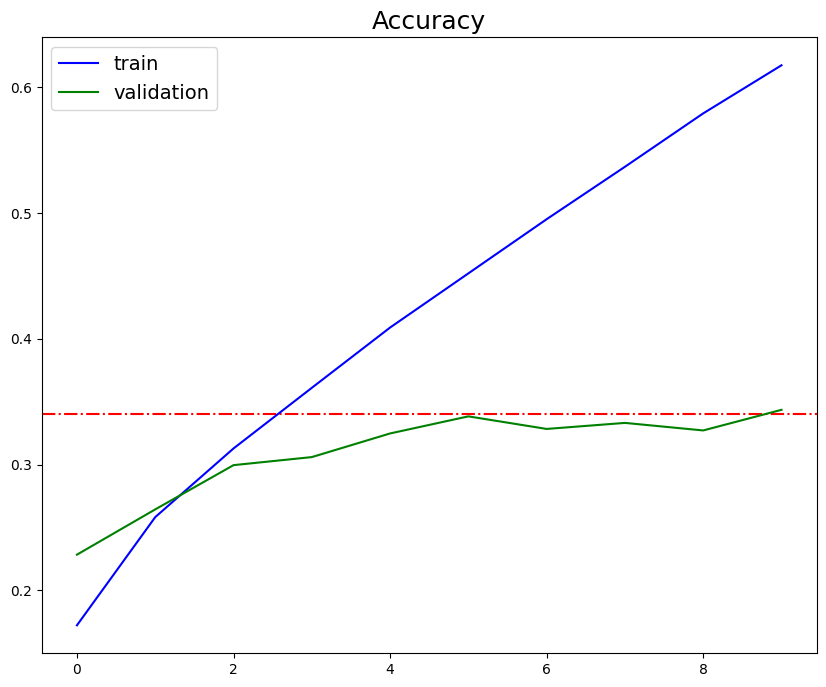

In [ ]:
plt.figure(figsize=(10, 8))
plt.axhline(y=0.34, color='red', linestyle='-.')
plt.plot([i for i in range(num_epochs)], train_accuracies, color="blue", label="train")
plt.plot([i for i in range(num_epochs)], test_accuracies, label="validation", color="green")
plt.title("Accuracy", fontsize=18)
plt.legend(fontsize=14)
plt.show()

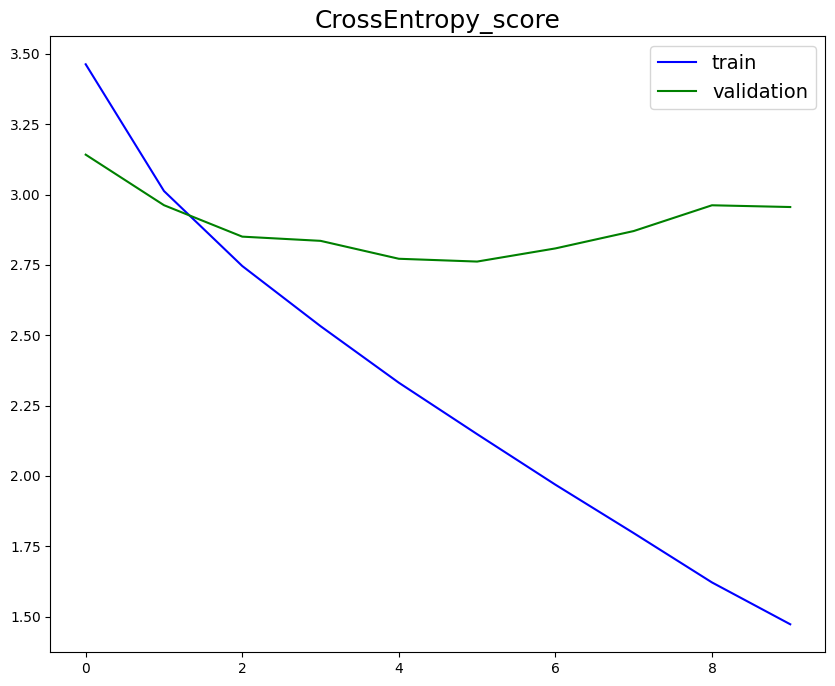

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot([i for i in range(num_epochs)], train_losses, color="blue", label="train")
plt.plot([i for i in range(num_epochs)], test_losses, label="validation", color="green")
plt.title("CrossEntropy_score", fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [ ]:
print(f"Оценка за это задание составит {np.clip(5 * (max(test_accuracies)-0.24) / 0.1, 0, 5):.2f} баллов")

Оценка за это задание составит 5.00 баллов


### Валидация результатов задания

In [ ]:
#чуть-чуть переделал под свой алгоритм + gpt помог
def evaluate_task(model, val_dataloader, criterion, device="cuda:0"):
    model.eval()
    total_accuracy = 0

    for images, answers in tqdm(val_dataloader):
        images = images.to(device)
        answers = answers.to(device)
        with torch.no_grad():
            y_pred = model(images)
            loss = criterion(y_pred, answers)
            total_accuracy += (y_pred.argmax(dim=1) == answers).sum().item()


    accuracy = total_accuracy / len(val_dataloader.dataset)
    return accuracy

In [ ]:
seed_everything(123456)
# model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model_2, val_dataloader, criterion)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy-0.24) / 0.1, 0, 5):.2f} баллов")

100%|██████████| 20/20 [00:03<00:00,  6.59it/s]

Оценка за это задание составит 5.00 баллов


# Отчёт об экспериментах

Задание 1

https://api.wandb.ai/links/priborakirill276-hse-university/kyxvoa9e

Продублирую на всякий случай:

Если посмотреть на графики, то они в целом очень похожи, особенно на обучающей выборке. В данном разделе я оставил только три инициализации, на которых получилось выбить 0.24. Параметры в этих инициализациях особо не отличаются, менялись только вероятности в аугментациях. Из важного можно отметить, что регуляризировать или как-то ещё фиксить переобучение было фатальной ошибкой, так как при регуляризации модель просто выходила на плато на обучающей выборке, а без валидации она может угадать часть ответов. (ещё в 1 номере есть трабл, там почему-то сид не фиксируется, но я 3 раза выбил 0.24, считаю, что это достойно)

Задание 2

https://api.wandb.ai/links/priborakirill276-hse-university/41f9afi0

Продублирую на всякий случай:

Во втором задании представлены все попытки инициализации кода. Больше всего качество помогло выбить увеличение глубины модели (остановился на resnet50). Также сильно помогло уменьшение шага градиентного спуска и лишь немного помогли аугментации, что логично, так как плохие данные очень сложно исправить. Логика действий была такая же, как в первом номере, заставить модель переобучиться и просто угадать какую-то часть ответов, что, в целом, получилось реализовать. (а вот во 2 номере с инициализациями всё ок, хотя вроде сиды я везде фиксировал)